In [1]:
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import scipy.signal as signal
import pandas as pd
import matplotlib.dates as dates
import obspy.signal.trigger as trigger
import obspy.signal.filter as filter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import config
from event_pipeline import Event
from obspy.imaging.spectrogram import spectrogram

plt.rcParams.update({'font.size':22})


def import_data(day, starttime, endtime):
    daypaths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=day)
    starttime = obspy.UTCDateTime(starttime)
    endtime = obspy.UTCDateTime(endtime)
    data = load.import_corrected_data_for_single_day(daypaths)
    data.trim(starttime=starttime, endtime=endtime)
    return data

In [2]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    # return (ret[n - 1:] / n)/ret.max()
    return ret[n - 1:] / n

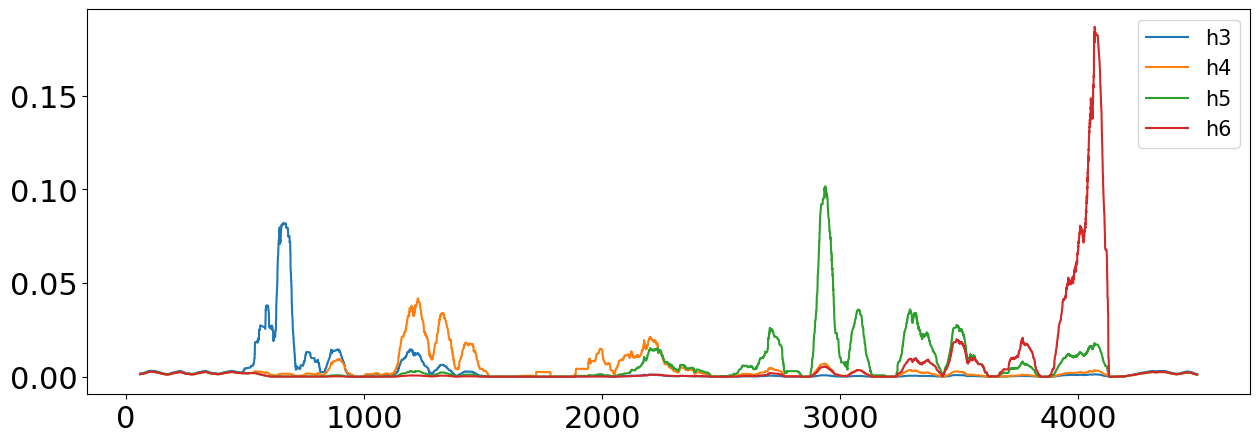

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))

window_size = 1000*60

# day141 = import_data(day=141, starttime='2019-05-21T07:00:00.0Z', endtime='2019-05-21T09:00:00.0Z')
# day141 = import_data(day=141, starttime='2019-05-21T07:30:00.0Z', endtime='2019-05-21T09:00:00.0Z')
day141 = import_data(day=141, starttime='2019-05-21T07:30:00.0Z', endtime='2019-05-21T08:45:00.0Z')
day141.filter(type='highpass', freq=50)

ax.plot(day141[2].times()[window_size - 1:], moving_average(day141[2].data**2, n=window_size), label='h3')
ax.plot(day141[3].times()[window_size - 1:], moving_average(day141[3].data**2, n=window_size), label='h4')
ax.plot(day141[4].times()[window_size - 1:], moving_average(day141[4].data**2, n=window_size), label='h5')
ax.plot(day141[5].times()[window_size - 1:], moving_average(day141[5].data**2, n=window_size), label='h6')
ax.legend(fontsize=15)

# ax[0].plot(h5.times(), moving_average(h5.data**2, n=5000))
# ax[0].plot(h6.times(), moving_average(h6.data**2, n=5000), alpha=0.5)

In [4]:
print('whats going on')

whats going on


In [5]:
import obspy
swarm_starttime = {
     '141':obspy.UTCDateTime('2019-05-21T07:30:00')
    ,'188':obspy.UTCDateTime('2019-07-07T08:40:00.0Z')
    ,'197':obspy.UTCDateTime('2019-07-16T21:45:00.0Z')
    ,'211':obspy.UTCDateTime('2019-07-30T22:30:05.142999Z')
    }

swarm_endtime = {
    '141':obspy.UTCDateTime('2019-05-21T09:00:00.0Z')
    ,'188':obspy.UTCDateTime('2019-07-07T10:15:00.0Z')
    ,'197':obspy.UTCDateTime('2019-07-17T00:00:00.337999Z')
    ,'211':obspy.UTCDateTime('2019-07-30T23:07:04.430999Z')
    }

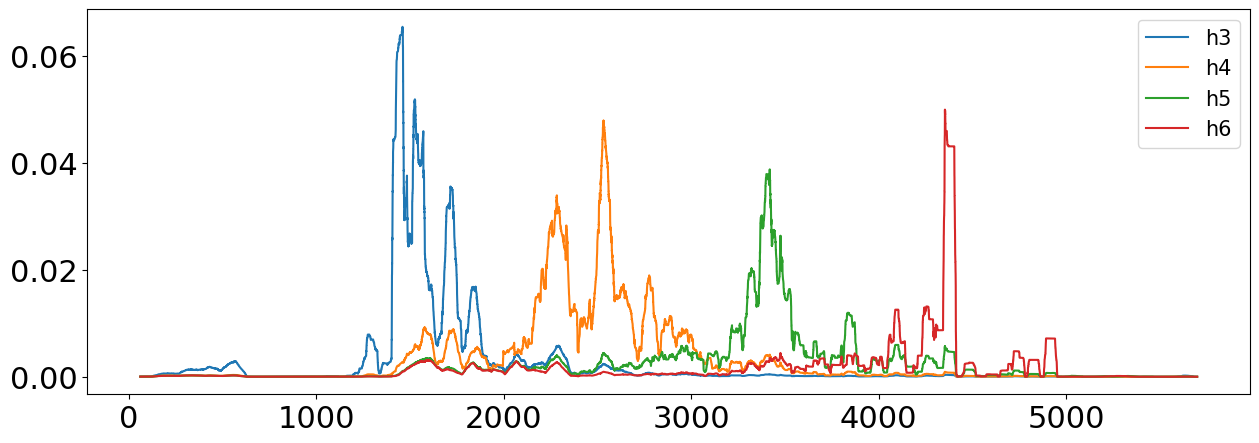

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

window_size = 1000*60

day188 = import_data(day=188, starttime='2019-07-07T08:40:00.0Z', endtime='2019-07-07T10:15:00.0Z')
day188.filter(type='highpass', freq=50)

ax.plot(day188[2].times()[window_size - 1:], moving_average(day188[2].data**2, n=window_size), label='h3')
ax.plot(day188[3].times()[window_size - 1:], moving_average(day188[3].data**2, n=window_size), label='h4')
ax.plot(day188[4].times()[window_size - 1:], moving_average(day188[4].data**2, n=window_size), label='h5')
ax.plot(day188[5].times()[window_size - 1:], moving_average(day188[5].data**2, n=window_size), label='h6')
ax.legend(fontsize=15)

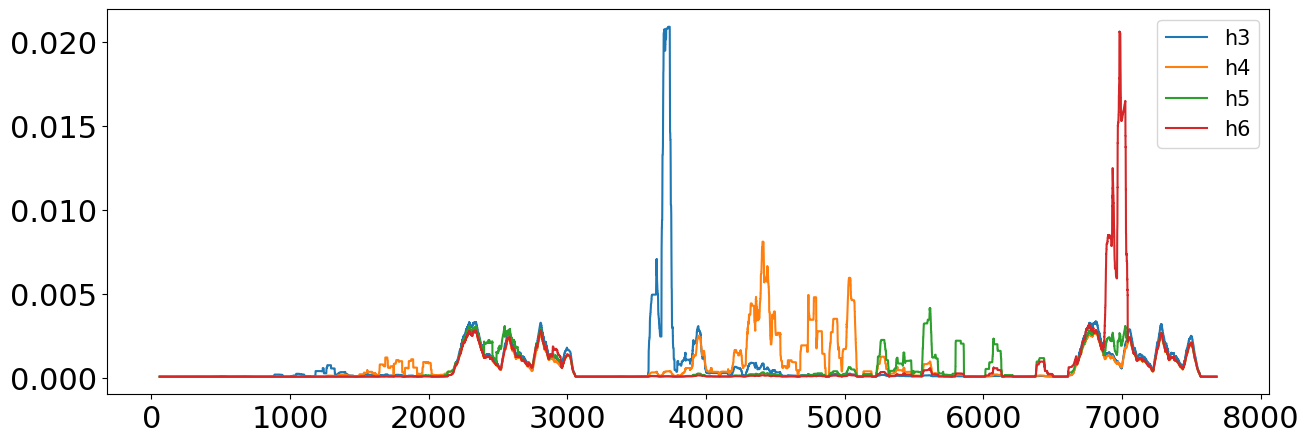

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

window_size = 1000*60

# day197 = import_data(day=197, starttime='2019-07-16T21:45:00.0Z', endtime='2019-07-17T00:00:00.337999Z')
day197 = import_data(day=197, starttime='2019-07-16T21:45:00.0Z', endtime='2019-07-16T23:53:00.337999Z')
day197.filter(type='highpass', freq=50)
97
ax.plot(day197[2].times()[window_size - 1:], moving_average(day197[2].data**2, n=window_size), label='h3')
ax.plot(day197[3].times()[window_size - 1:], moving_average(day197[3].data**2, n=window_size), label='h4')
ax.plot(day197[4].times()[window_size - 1:], moving_average(day197[4].data**2, n=window_size), label='h5')
ax.plot(day197[5].times()[window_size - 1:], moving_average(day197[5].data**2, n=window_size), label='h6')
ax.legend(fontsize=15)

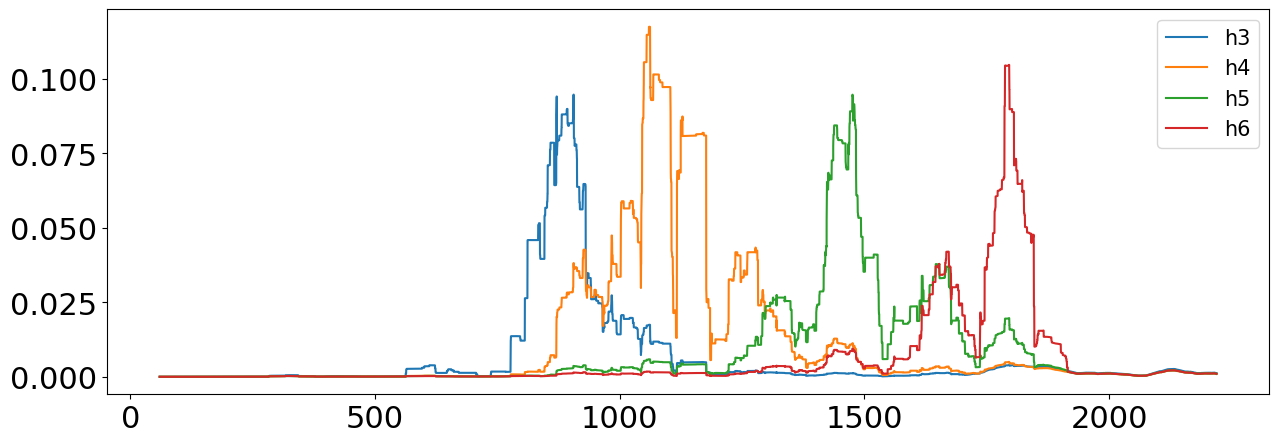

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

window_size = 1000*60

day211 = import_data(day=211, starttime='2019-07-30T22:30:05.142999Z', endtime='2019-07-30T23:07:04.430999Z')
day211.filter(type='highpass', freq=50)
97
ax.plot(day211[2].times()[window_size - 1:], moving_average(day211[2].data**2, n=window_size), label='h3')
ax.plot(day211[3].times()[window_size - 1:], moving_average(day211[3].data**2, n=window_size), label='h4')
ax.plot(day211[4].times()[window_size - 1:], moving_average(day211[4].data**2, n=window_size), label='h5')
ax.plot(day211[5].times()[window_size - 1:], moving_average(day211[5].data**2, n=window_size), label='h6')
ax.legend(fontsize=15)

In [9]:
str(day141[0].stats.starttime.datetime)

'2019-05-21 07:30:00'

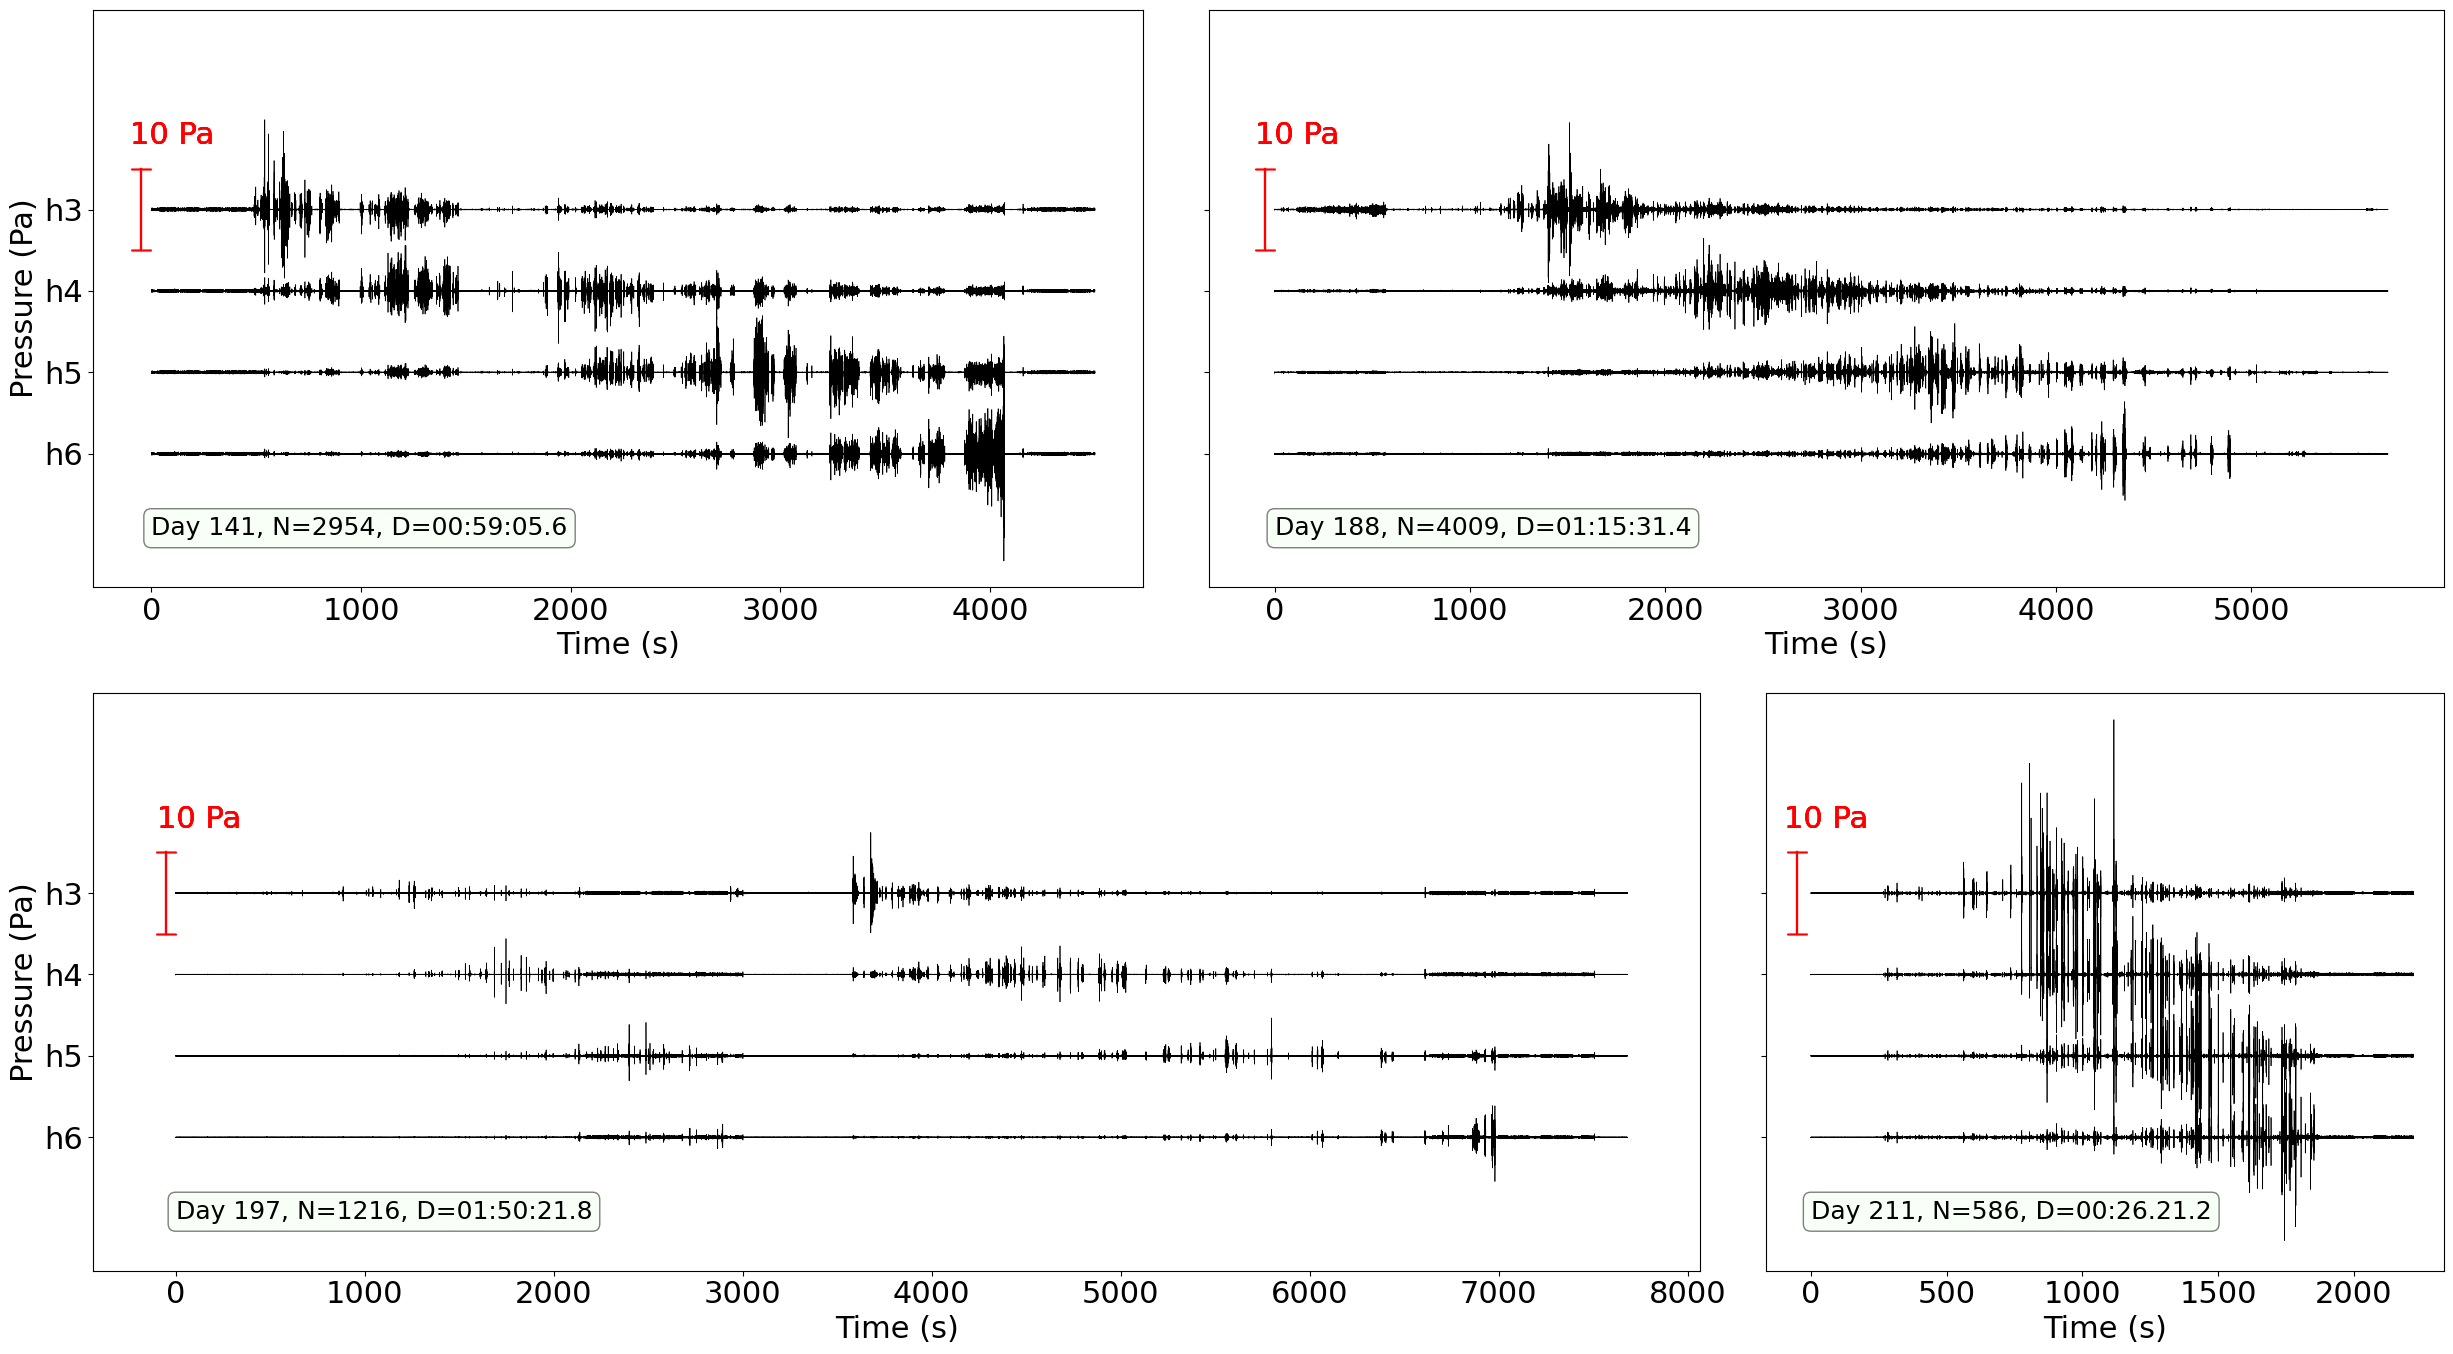

In [10]:
fig = plt.figure(figsize=(25, 14))
mosaic = fig.subplot_mosaic('''
                            aaaaaabbbbbbb
                            cccccccccdddd
                            '''
                           ,sharey=True
                           ,sharex=False)

def plot_waveforms(data, ax):
    for n, tr in enumerate(data[2:]):
        t = tr.times()
        d = tr.data
        ax.plot(t, d-n*10, color='black', linewidth=0.5)
        ax.set_xlabel('Time (s)')
        ax.plot((-50, -50), (-5, 5), marker='_', markersize=15, color='red')
        ax.text(s='10 Pa', x=-100, y=8, color='red')
        # ax.text(s=f'h{n+2}', x=t.max()+50, y=-n*10)
        # ax.set_xlim(-1000, t.max()+1000)

# day141.trim(starttime=UTC.'2019-05-21T07:00:00.0Z', endtime='2019-05-21T09:00:00.0Z')

plot_waveforms(data=day141, ax=mosaic['a'])
plot_waveforms(data=day188, ax=mosaic['b'])
plot_waveforms(data=day197, ax=mosaic['c'])
plot_waveforms(data=day211, ax=mosaic['d'])

# mosaic['a'].set_ylim(-20, 20)
mosaic['a'].set_yticks([0, -10, -20, -30])
mosaic['a'].set_yticklabels(['h3', 'h4', 'h5', 'h6'])
mosaic['a'].set_ylabel('Pressure (Pa)')
mosaic['c'].set_ylabel('Pressure (Pa)')
# mosaic['d'].set_xlim(-100, 2500)
# mosaic['a'].set_xlim(-100, 5000)
# mosaic['b'].set_xlim(-100, 6000)
# mosaic['c'].set_xlim(-100, 8200)
# mosaic['d'].set_xlim(-100, 2500)

props = dict(boxstyle='round', facecolor='honeydew', alpha=0.5)

mosaic['a'].text(s='Day 141, N=2954, D=00:59:05.6', bbox=props, x=0, y=-40, fontsize=18)
mosaic['b'].text(s='Day 188, N=4009, D=01:15:31.4', bbox=props, x=0, y=-40, fontsize=18)
mosaic['c'].text(s='Day 197, N=1216, D=01:50:21.8', bbox=props, x=0, y=-40, fontsize=18)
mosaic['d'].text(s='Day 211, N=586, D=00:26.21.2', bbox=props, x=0, y=-40, fontsize=18)

fig.tight_layout()
fig.savefig('fig2.pdf', bbox_inches='tight')
# D141=00:59:05.6, D188=01:16:31.4,171
# D197=01:50:21.8, and D211=00:26:21.2.172

In [11]:
# fig, ax = plt.subplots(2, 2, figsize=(20, 20), sharey=True, sharex=True)

# ax = ax.flatten()

# def plot_waveforms(data, ax):
#     for n, tr in enumerate(data[2:]):
#         t = tr.times()
#         d = tr.data
#         ax.plot(t, d-n*2, color='black', linewidth=0.5)

# # day141.trim(starttime=UTC.'2019-05-21T07:00:00.0Z', endtime='2019-05-21T09:00:00.0Z')

# plot_waveforms(data=day141, ax=ax[0])
# plot_waveforms(data=day188, ax=ax[1])
# plot_waveforms(data=day197, ax=ax[2])
# plot_waveforms(data=day211, ax=ax[3])

# fig.tight_layout()

In [12]:
2000/60

33.333333333333336

In [13]:
500/60

8.333333333333334